In [156]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd
import ipywidgets as widgets

In [157]:
def circle_fit(x1, y1, x2, y2, x3, y3):
    x12 = x1 - x2
    x13 = x1 - x3
    y12 = y1 - y2
    y13 = y1 - y3
    y31 = y3 - y1
    y21 = y2 - y1
    x31 = x3 - x1
    x21 = x2 - x1
    sx13 = x1**2 - x3**2
    sy13 = y1**2 - y3**2
    sx21 = x2**2 - x1**2
    sy21 = y2**2 - y1**2
    f = ((sx13) * (x12) + (sy13) * (x12) + (sx21) * (x13) + (sy21) * (x13)) / (2 * ((y31) * (x12) - (y21) * (x13)))
    g = ((sx13) * (y12) + (sy13) * (y12) + (sx21) * (y13) + (sy21) * (y13)) / (2 * ((x31) * (y12) - (x21) * (y13)))
    c = -x1**2 - y1**2 - 2 * g * x1 - 2 * f * y1
    h = -g
    k = -f
    r = np.sqrt(h**2 + k**2 - c)
    return h, k, r

In [158]:
f = uproot.open("/home/users/hdhoang2001/cmssw/src/RecoTracker/LSTCore/standalone/debug_nan.root:tree")

In [159]:
tree = f.arrays(["t3_residual", 
                 "t3_isFake", 
                 "t3_isPerfect", 
                 "t3_region", 
                 "t3_rzChiSquared",
                 "t3_pt", 
                 "t3_eta", 
                 "t3_phi",
                 "t3_layer0",
                 "t3_layer1",
                 "t3_layer2",
                 "t3_x0",
                 "t3_y0",
                 "t3_z0",
                 "t3_r0",
                 "t3_x1",
                 "t3_y1",
                 "t3_z1",
                 "t3_r1",
                 "t3_x2",
                 "t3_y2",
                 "t3_z2",
                 "t3_r2",
                 "t3_circleRadius",
                 "t3_lastMD_drdz",
                 "t3_lastMD_side",
                 "t3_lastMD_subdet",
                ], library="np")

In [160]:
res = np.abs(np.concatenate(tree["t3_residual"]))
isfake = np.concatenate(tree["t3_isFake"])
isperfect = np.concatenate(tree["t3_isPerfect"])
region = np.concatenate(tree["t3_region"])
rzchi2 = np.concatenate(tree["t3_rzChiSquared"])
pt = np.concatenate(tree["t3_pt"])
eta = np.concatenate(tree["t3_eta"])
phi = np.concatenate(tree["t3_phi"])
layer0 = np.concatenate(tree["t3_layer0"])
layer1 = np.concatenate(tree["t3_layer1"])
layer2 = np.concatenate(tree["t3_layer2"])
drdz = np.concatenate(tree["t3_lastMD_drdz"])
side = np.concatenate(tree["t3_lastMD_side"])
subdet = np.concatenate(tree["t3_lastMD_subdet"])

In [161]:
x0 = np.concatenate(tree["t3_x0"]) / 100
y0 = np.concatenate(tree["t3_y0"]) / 100
z0 = np.concatenate(tree["t3_z0"]) / 100
r0 = np.concatenate(tree["t3_r0"]) / 100
x1 = np.concatenate(tree["t3_x1"]) / 100
y1 = np.concatenate(tree["t3_y1"]) / 100
z1 = np.concatenate(tree["t3_z1"]) / 100
r1 = np.concatenate(tree["t3_r1"]) / 100
x2 = np.concatenate(tree["t3_x2"]) / 100
y2 = np.concatenate(tree["t3_y2"]) / 100
z2 = np.concatenate(tree["t3_z2"]) / 100
r2 = np.concatenate(tree["t3_r2"]) / 100
circle_radius = np.concatenate(tree["t3_circleRadius"])

In [162]:
region_components = ["Endcap 1, 2, 3 ps",
                     "Endcap 1, 2 ps, 3 2s",
                     "Endcap 1 ps, 2, 3 2s",
                     "Endcap 2, 3, 4 ps",
                     "Endcap 2, 3 ps, 4 2s",
                     "Endcap 2 ps, 3, 4 2s",
                     "Endcap 3, 4, 5 ps",
                     "Endcap 3, 4 ps, 5 2s",
                     "Endcap 3 ps, 4, 5 2s",
                     "Barrel 1, Endcap 1, 2 ps",
                     "Barrel 1, 2, Endcap 1 ps",
                     "Barrel 1, 2, 3",
                     "Barrel 2, Endcap 1, 2 ps",
                     "Barrel 2, Endcap 1 ps, 2 2s",
                     "Barrel 2, 3, Endcap 1 ps",
                     "Barrel 2, 3, Endcap 1 2s",
                     "Barrel 2, 3, 4",
                     "Barrel 3, Endcap 1, 2 ps",
                     "Barrel 3, Endcap 1 ps, 2 2s",
                     "Barrel 3, Endcap 1, 2 2s",
                     "Barrel 3, 4, 5",
                     "Barrel 3, 4, Endcap 1 2s",
                     "Barrel 4, Endcap 1, 2 ps",
                     "Barrel 4, 5, 6",
                     "Barrel 4, 5, Endcap 1 2s",
                     "Barrel 5, Endcap 1, 2 2s"]

In [163]:
InnerPixel = 0
Barrel = 5 
Endcap = 4
NegZ = 1 
PosZ = 2 
Center = 3

In [164]:
x0_true = x0[isperfect==1]
y0_true = y0[isperfect==1]
z0_true = z0[isperfect==1]
r0_true = r0[isperfect==1]
x1_true = x1[isperfect==1]
y1_true = y1[isperfect==1]
z1_true = z1[isperfect==1]
r1_true = r1[isperfect==1]
x2_true = x2[isperfect==1]
y2_true = y2[isperfect==1]
z2_true = z2[isperfect==1]
r2_true = r2[isperfect==1]
pt_true = pt[isperfect==1]
region_true = region[isperfect==1]
rzchi2_true = rzchi2[isperfect==1]
circle_radius_true = circle_radius[isperfect==1]
drdz_true = drdz[isperfect==1]
side_true = side[isperfect==1]
subdet_true = subdet[isperfect==1]
layer2_true = layer2[isperfect==1]

In [230]:
i = np.random.randint(0, len(x0_true))

In [231]:
i

353781

In [232]:
print(f"pt: {pt_true[i]}")
print(f"region: {region_components[int(region_true[i])]}")
print(f"rzchi2: {rzchi2_true[i]}")
print(f"circle_radius: {circle_radius_true[i]}")
print(f"x0: {x0_true[i]}")
print(f"y0: {y0_true[i]}")
print(f"z0: {z0_true[i]}")
print(f"r0: {r0_true[i]}")
print(f"x1: {x1_true[i]}")
print(f"y1: {y1_true[i]}")
print(f"z1: {z1_true[i]}")
print(f"r1: {r1_true[i]}")
print(f"x2: {x2_true[i]}")
print(f"y2: {y2_true[i]}")
print(f"z2: {z2_true[i]}")
print(f"r2: {r2_true[i]}")

pt: 1.3338357210159302
region: Barrel 1, 2, 3
rzchi2: 12.349139213562012
circle_radius: 117.0841293334961
x0: -0.12694959342479706
y0: 0.21023698151111603
z0: -0.13393449783325195
r0: 0.24559272825717926
x1: -0.21048282086849213
y1: 0.3089214563369751
z1: -0.2229425013065338
r1: 0.37381210923194885
x2: -0.32216566801071167
y2: 0.41254982352256775
z2: -0.32937347888946533
r2: 0.5234386920928955


In [233]:
xc, yc, radius = circle_fit(x0_true[i], y0_true[i], x1_true[i], y1_true[i], x2_true[i], y2_true[i])

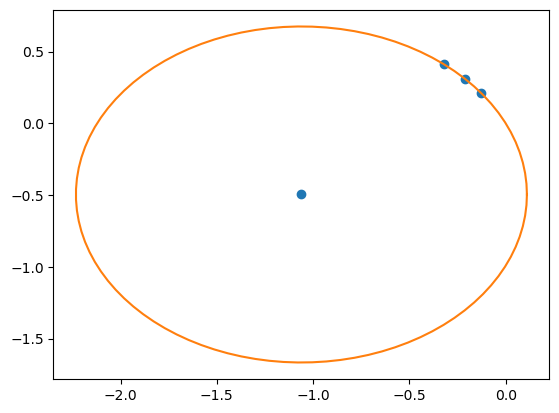

In [234]:
plt.plot([x0_true[i], x1_true[i], x2_true[i], xc], [y0_true[i], y1_true[i], y2_true[i], yc], 'o')
theta = np.linspace(0, 2*np.pi, 100)
x = xc + radius * np.cos(theta)
y = yc + radius * np.sin(theta)
plt.plot(x, y)

In [235]:
q = 0
slope3c = (y2_true[i] - yc) / (x2_true[i] - xc)
slope1c = (y0_true[i] - yc) / (x0_true[i] - xc)
if (y2_true[i] - yc) > 0 and (y0_true[i] - yc) > 0:
    if slope1c > 0 and slope3c < 0:
        q = -1
    elif slope1c < 0 and slope3c > 0:
        q = 1
    elif slope3c > slope1c:
        q = -1
    elif slope3c < slope1c:
        q = 1
elif (y2_true[i] - yc) < 0 and (y0_true[i] - yc) < 0:
    if slope1c < 0 and slope3c > 0:
        q = 1
    elif slope1c > 0 and slope3c < 0:
        q = -1
    elif slope3c > slope1c:
        q = -1
    elif slope3c < slope1c:
        q = 1
elif (y2_true[i] - yc) < 0 and (y0_true[i] - yc) > 0:
    if (x2_true[i] - xc) > 0 and (x0_true[i] - xc) > 0:
        q = 1
    elif (x2_true[i] - xc) < 0 and (x0_true[i] - xc) < 0:
        q = -1
elif (y2_true[i] - yc) > 0 and (y0_true[i] - yc) < 0:
    if (x2_true[i] - xc) > 0 and (x0_true[i] - xc) > 0:
        q = -1
    elif (x2_true[i] - xc) < 0 and (x0_true[i] - xc) < 0:
        q = 1
        
print(f"q: {q}")

q: -1


In [236]:
new_q = 0
slope01 = (y1_true[i] - y0_true[i]) / (x1_true[i] - x0_true[i])
slope12 = (y2_true[i] - y1_true[i]) / (x2_true[i] - x1_true[i])
if slope01 > 0 and slope12 < 0:
    if x0_true[i] < x1_true[i] < x2_true[i] or x0_true[i] > x1_true[i] > x2_true[i]:
        new_q = 1
    elif y0_true[i] < y1_true[i] < y2_true[i] or y0_true[i] > y1_true[i] > y2_true[i]:
        new_q = -1
elif slope01 < 0 and slope12 > 0:
    if x0_true[i] < x1_true[i] < x2_true[i] or x0_true[i] > x1_true[i] > x2_true[i]:
        new_q = -1
    elif y0_true[i] < y1_true[i] < y2_true[i] or y0_true[i] > y1_true[i] > y2_true[i]:
        new_q = 1
elif slope01 > 0 and slope12 > 0:
    if slope01 > slope12:
        new_q = 1
    else:
        new_q = -1
elif slope01 < 0 and slope12 < 0:
    if slope01 > slope12:
        new_q = 1
    else:
        new_q = -1

print(f"new_q: {new_q}")
        

new_q: -1


In [237]:
def get_q(i):
    xc, yc, radius = circle_fit(x0_true[i], y0_true[i], x1_true[i], y1_true[i], x2_true[i], y2_true[i])
    q = 0
    slope3c = (y2_true[i] - yc) / (x2_true[i] - xc)
    slope1c = (y0_true[i] - yc) / (x0_true[i] - xc)
    if (y2_true[i] - yc) > 0 and (y0_true[i] - yc) > 0:
        if slope1c > 0 and slope3c < 0:
            q = -1
        elif slope1c < 0 and slope3c > 0:
            q = 1
        elif slope3c > slope1c:
            q = -1
        elif slope3c < slope1c:
            q = 1
    elif (y2_true[i] - yc) < 0 and (y0_true[i] - yc) < 0:
        if slope1c < 0 and slope3c > 0:
            q = 1
        elif slope1c > 0 and slope3c < 0:
            q = -1
        elif slope3c > slope1c:
            q = -1
        elif slope3c < slope1c:
            q = 1
    elif (y2_true[i] - yc) < 0 and (y0_true[i] - yc) > 0:
        if (x2_true[i] - xc) > 0 and (x0_true[i] - xc) > 0:
            q = 1
        elif (x2_true[i] - xc) < 0 and (x0_true[i] - xc) < 0:
            q = -1
    elif (y2_true[i] - yc) > 0 and (y0_true[i] - yc) < 0:
        if (x2_true[i] - xc) > 0 and (x0_true[i] - xc) > 0:
            q = -1
        elif (x2_true[i] - xc) < 0 and (x0_true[i] - xc) < 0:
            q = 1
            
    return q

In [242]:
def get_new_q(i):
    new_q = 0
    slope01 = (y1_true[i] - y0_true[i]) / (x1_true[i] - x0_true[i])
    slope12 = (y2_true[i] - y1_true[i]) / (x2_true[i] - x1_true[i])
    if slope01 > 0 and slope12 < 0:
        if x0_true[i] < x1_true[i] < x2_true[i] or x0_true[i] > x1_true[i] > x2_true[i]:
            new_q = 1
        elif y0_true[i] < y1_true[i] < y2_true[i] or y0_true[i] > y1_true[i] > y2_true[i]:
            new_q = -1
    elif slope01 < 0 and slope12 > 0:
        if x0_true[i] < x1_true[i] < x2_true[i] or x0_true[i] > x1_true[i] > x2_true[i]:
            new_q = -1
        elif y0_true[i] < y1_true[i] < y2_true[i] or y0_true[i] > y1_true[i] > y2_true[i]:
            new_q = 1
    elif slope01 > 0 and slope12 > 0:
        if slope01 > slope12:
            new_q = 1
        else:
            new_q = -1
    elif slope01 < 0 and slope12 < 0:
        if slope01 > slope12:
            new_q = 1
        else:
            new_q = -1
            
    return new_q



In [243]:
for i in range(len(x0_true)):
    if get_q(i) != get_new_q(i):
        print(i)
        print(f"q: {get_q(i)}")
        print(f"new_q: {get_new_q(i)}")

13910
q: 0
new_q: 1
13937
q: 0
new_q: 1
78648
q: 0
new_q: -1
80156
q: 0
new_q: -1
101584
q: 0
new_q: 1
435994
q: 0
new_q: -1


In [171]:
# q = 1
Bz = 3.8112
a = -0.299792 * Bz * q
pseudo_phi = np.arctan((y1_true[i] - yc)/(x1_true[i] - xc))
px = np.abs(pt_true[i] * np.sin(pseudo_phi))
py = np.abs(pt_true[i] * np.cos(pseudo_phi))

In [172]:
if (x1_true[i] > xc and y1_true[i] > yc):
    if q == 1:
        py = -py
    if q == -1:
        px = -px
elif (x1_true[i] < xc and y1_true[i] > yc):
    if q == -1:
        px = -px
        py = -py
elif (x1_true[i] < xc and y1_true[i] < yc):
    if q == 1:
        px = -px
    if q == -1:
        py = -py
elif (x1_true[i] > xc and y1_true[i] < yc):
    if q == 1:
        px = -px
        py = -py

if (x2_true[i] < x1_true[i] and x1_true[i] < x0_true[i]):
    px = -np.abs(px)
if (x2_true[i] > x1_true[i] and x1_true[i] > x0_true[i]):
    px = np.abs(px)
if (y2_true[i] < y1_true[i] and y1_true[i] < y0_true[i]):
    py = -np.abs(py)
if (y2_true[i] > y1_true[i] and y1_true[i] > y0_true[i]):
    py = np.abs(py)
        
print(f"px: {px}")
print(f"py: {py}")

px: 0.5202430498162398
py: 1.2915298343733044


In [173]:
# distance01 = np.sqrt((x0[i] - x1[i])**2 + (y0[i] - y1[i])**2)
# central_angle01 = 2 * np.arcsin(distance01 / (2 * radius))
AO = np.sqrt((x0_true[i] - xc)**2 + (y0_true[i] - yc)**2)
BO = np.sqrt((x1_true[i] - xc)**2 + (y1_true[i] - yc)**2)
AB = np.sqrt((x1_true[i] - x0_true[i])**2 + (y1_true[i] - y0_true[i])**2)
central_angle01 = np.arccos((AO**2 + BO**2 - AB**2) / (2 * AO * BO))
ds = radius * central_angle01
pz = pt_true[i] * (z1_true[i] - z0_true[i]) / ds
p = np.sqrt(px**2 + py**2 + pz**2)
rho = a / p

In [174]:
s = (z2_true[i] - z1_true[i]) * p / pz
x = x1_true[i] + px / a * np.sin(rho * s) - py / a * (1 - np.cos(rho * s))
y = y1_true[i] + px / a * (1 - np.cos(rho * s)) + py / a * np.sin(rho * s)
r = np.sqrt(x**2 + y**2)
diffr = r - r2_true[i]

In [175]:
diffz = 0
paraA = r1_true[i]**2 + 2 * (px**2 + py**2) / (a**2) + 2 * (y1_true[i] * px - x1_true[i] * py) / a - r2_true[i]**2
paraB = 2 * (x1_true[i] * px + y1_true[i] * py) / a
paraC = 2 * (y1_true[i] * px - x1_true[i] * py) / a + 2 * (px**2 + py**2) / (a**2)
A = paraB**2 + paraC**2
B = 2 * paraA * paraB
C = paraA**2 - paraC**2
sol1 = (-B + np.sqrt(B**2 - 4 * A * C)) / (2 * A)
sol2 = (-B - np.sqrt(B**2 - 4 * A * C)) / (2 * A)
solz1 = np.arcsin(sol1) / rho * pz / p + z1_true[i]
solz2 = np.arcsin(sol2) / rho * pz / p + z1_true[i]
diffz1 = (solz1 - z2_true[i]) * 100
diffz2 = (solz2 - z2_true[i]) * 100
print(f"A: {A}")
print(f"B: {B}")
print(f"C: {C}")
print(f"B^2 - 4AC: {B**2 - 4 * A * C}")
if np.isnan(diffz1):
    diffz = diffz2
elif np.isnan(diffz2):
    diffz = diffz1
else:
    diffz = diffz1 if np.abs(diffz1) < np.abs(diffz2) else diffz2

A: 8.831629981248739
B: -4.862408840140322
C: -0.6860441861555229
B^2 - 4AC: 47.87857334032478


In [176]:
residual = diffz if layer2_true[i] <= 6 and (side_true[i] == Center or drdz_true[i] < 1) else diffr

In [177]:
error = 0
if layer2_true[i] >= 12 or 4 <= layer2_true[i] <= 6:
    error = 5.0
else:
    error = 0.15

projection_missing = 1
if drdz_true[i] < 1:
    if subdet_true[i] == Endcap or side_true[i] == Center:
        projection_missing = 1
    else:
        projection_missing = 1 / np.sqrt(1 + drdz_true[i]**2)
if drdz_true[i] > 1:
    if subdet_true[i] == Endcap or side_true[i] == Center:
        projection_missing = 1
    else:
        projection_missing = drdz_true[i] / np.sqrt(1 + drdz_true[i]**2)
        
error = error * projection_missing

In [178]:
residual * residual / error / error * 12 * 10000

3177.489587499063

In [179]:
rzchi2_true[i]

0.11408159

In [180]:
x0_nan_true = x0[(isperfect==1) & (rzchi2==-1)]
y0_nan_true = y0[(isperfect==1) & (rzchi2==-1)]
z0_nan_true = z0[(isperfect==1) & (rzchi2==-1)]
r0_nan_true = r0[(isperfect==1) & (rzchi2==-1)]
x1_nan_true = x1[(isperfect==1) & (rzchi2==-1)]
y1_nan_true = y1[(isperfect==1) & (rzchi2==-1)]
z1_nan_true = z1[(isperfect==1) & (rzchi2==-1)]
r1_nan_true = r1[(isperfect==1) & (rzchi2==-1)]
x2_nan_true = x2[(isperfect==1) & (rzchi2==-1)]
y2_nan_true = y2[(isperfect==1) & (rzchi2==-1)]
z2_nan_true = z2[(isperfect==1) & (rzchi2==-1)]
r2_nan_true = r2[(isperfect==1) & (rzchi2==-1)]
pt_nan_true = pt[(isperfect==1) & (rzchi2==-1)]
region_nan_true = region[(isperfect==1) & (rzchi2==-1)]
rzchi2_nan_true = rzchi2[(isperfect==1) & (rzchi2==-1)]
circle_radius_nan_true = circle_radius[(isperfect==1) & (rzchi2==-1)]
drdz_nan_true = drdz[(isperfect==1) & (rzchi2==-1)]
side_nan_true = side[(isperfect==1) & (rzchi2==-1)]
subdet_nan_true = subdet[(isperfect==1) & (rzchi2==-1)]
layer2_nan_true = layer2[(isperfect==1) & (rzchi2==-1)]


In [181]:
i = np.random.randint(0, len(x0_nan_true))
print(f"circle_radius: {circle_radius_nan_true[i]}")

circle_radius: 143175.8125


In [182]:
i

64

In [183]:
print(f"pt: {pt_nan_true[i]}")
print(f"region: {region_components[int(region_nan_true[i])]}")
print(f"rzchi2: {rzchi2_nan_true[i]}")
print(f"circle_radius: {circle_radius_nan_true[i]}")
print(f"x0: {x0_nan_true[i]}")
print(f"y0: {y0_nan_true[i]}")
print(f"z0: {z0_nan_true[i]}")
print(f"r0: {r0_nan_true[i]}")
print(f"x1: {x1_nan_true[i]}")
print(f"y1: {y1_nan_true[i]}")
print(f"z1: {z1_nan_true[i]}")
print(f"r1: {r1_nan_true[i]}")
print(f"x2: {x2_nan_true[i]}")
print(f"y2: {y2_nan_true[i]}")
print(f"z2: {z2_nan_true[i]}")
print(f"r2: {r2_nan_true[i]}")


pt: 1631.0751953125
region: Endcap 2 ps, 3, 4 2s
rzchi2: -1.0
circle_radius: 143175.8125
x0: -0.5089090466499329
y0: -0.3925189673900604
z0: 1.5713049173355103
r0: 0.6426970958709717
x1: -0.611436665058136
y1: -0.4215885400772095
z1: 1.8607600927352905
r1: 0.7426921725273132
x2: -0.7948049902915955
y2: -0.47355830669403076
z2: 2.2235498428344727
r2: 0.9251878261566162


In [184]:
xc, yc, radius = circle_fit(x0_nan_true[i], y0_nan_true[i], x1_nan_true[i], y1_nan_true[i], x2_nan_true[i], y2_nan_true[i])

In [185]:
print(f"xc: {xc}")
print(f"yc: {yc}")

xc: -392.0098277476059
yc: 1380.226115071847


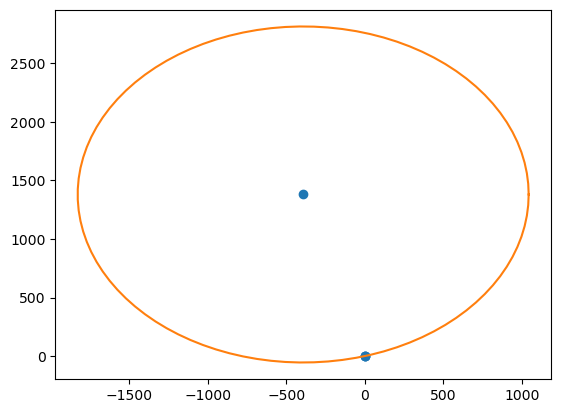

In [186]:
plt.plot([x0_nan_true[i], x1_nan_true[i], x2_nan_true[i], xc], [y0_nan_true[i], y1_nan_true[i], y2_nan_true[i], yc], 'o')
theta = np.linspace(0, 2*np.pi, 100)
x = xc + radius * np.cos(theta)
y = yc + radius * np.sin(theta)
plt.plot(x, y)


In [187]:
q = 0
slope3c = (y2_nan_true[i] - yc) / (x2_nan_true[i] - xc)
slope1c = (y0_nan_true[i] - yc) / (x0_nan_true[i] - xc)
if (y2_nan_true[i] - yc) > 0 and (y0_nan_true[i] - yc) > 0:
    if slope1c > 0 and slope3c < 0:
        q = -1
    elif slope1c < 0 and slope3c > 0:
        q = 1
    elif slope3c > slope1c:
        q = -1
    elif slope3c < slope1c:
        q = 1
elif (y2_nan_true[i] - yc) < 0 and (y0_nan_true[i] - yc) < 0:
    if slope1c < 0 and slope3c > 0:
        q = 1
    elif slope1c > 0 and slope3c < 0:
        q = -1
    elif slope3c > slope1c:
        q = -1
    elif slope3c < slope1c:
        q = 1
elif (y2_nan_true[i] - yc) < 0 and (y0_nan_true[i] - yc) > 0:
    if (x2_nan_true[i] - xc) > 0 and (x0_nan_true[i] - xc) > 0:
        q = 1
    elif (x2_nan_true[i] - xc) < 0 and (x0_nan_true[i] - xc) < 0:
        q = -1
elif (y2_nan_true[i] - yc) > 0 and (y0_nan_true[i] - yc) < 0:
    if (x2_nan_true[i] - xc) > 0 and (x0_nan_true[i] - xc) > 0:
        q = -1
    elif (x2_nan_true[i] - xc) < 0 and (x0_nan_true[i] - xc) < 0:
        q = 1
        
print(f"q: {q}")
print(f"slope1c: {slope1c}")
print(f"slope3c: {slope3c}")
print(f"y2 - yc: {y2_nan_true[i] - yc}")
print(f"x2 - xc: {x2_nan_true[i] - xc}")
print(f"y0 - yc: {y0_nan_true[i] - yc}")
print(f"x0 - xc: {x0_nan_true[i] - xc}")

q: 1
slope1c: -3.526476102841048
slope3c: -3.5292603633859994
y2 - yc: -1380.699673378541
x2 - xc: 391.21502275731433
y0 - yc: -1380.6186340392371
x0 - xc: 391.500918700956


In [188]:
Bz = 3.8112
a = -0.299792 * Bz * q
pseudo_phi = np.arctan((y1_nan_true[i] - yc)/(x1_nan_true[i] - xc))
px = np.abs(pt_nan_true[i] * np.sin(pseudo_phi))
py = np.abs(pt_nan_true[i] * np.cos(pseudo_phi))


In [189]:
if (x1_nan_true[i] > xc and y1_nan_true[i] > yc):
    if q == 1:
        py = -py
    if q == -1:
        px = -px
elif (x1_nan_true[i] < xc and y1_nan_true[i] > yc):
    if q == -1:
        px = -px
        py = -py
elif (x1_nan_true[i] < xc and y1_nan_true[i] < yc):
    if q == 1:
        px = -px
    if q == -1:
        py = -py
elif (x1_nan_true[i] > xc and y1_nan_true[i] < yc):
    if q == 1:
        px = -px
        py = -py
        
if (x2_nan_true[i] < x1_nan_true[i] and x1_nan_true[i] < x0_nan_true[i]):
    px = -np.abs(px)
if (x2_nan_true[i] > x1_nan_true[i] and x1_nan_true[i] > x0_nan_true[i]):
    px = np.abs(px)
if (y2_nan_true[i] < y1_nan_true[i] and y1_nan_true[i] < y0_nan_true[i]):
    py = -np.abs(py)
if (y2_nan_true[i] > y1_nan_true[i] and y1_nan_true[i] > y0_nan_true[i]):
    py = np.abs(py)
    

In [190]:
AO = np.sqrt((x0_nan_true[i] - xc)**2 + (y0_nan_true[i] - yc)**2)
BO = np.sqrt((x1_nan_true[i] - xc)**2 + (y1_nan_true[i] - yc)**2)
AB = np.sqrt((x1_nan_true[i] - x0_nan_true[i])**2 + (y1_nan_true[i] - y0_nan_true[i])**2)
central_angle01 = np.arccos((AO**2 + BO**2 - AB**2) / (2 * AO * BO))
ds = radius * central_angle01
pz = pt_nan_true[i] * (z1_nan_true[i] - z0_nan_true[i]) / ds
p = np.sqrt(px**2 + py**2 + pz**2)
rho = a / p


In [191]:
s = (z2_nan_true[i] - z1_nan_true[i]) * p / pz
x = x1_nan_true[i] + px / a * np.sin(rho * s) - py / a * (1 - np.cos(rho * s))
y = y1_nan_true[i] + px / a * (1 - np.cos(rho * s)) + py / a * np.sin(rho * s)
r = np.sqrt(x**2 + y**2)
diffr = r - r2_nan_true[i]

In [192]:
diffz = 0
paraA = r1_nan_true[i]**2 + 2 * (px**2 + py**2) / (a**2) + 2 * (y1_nan_true[i] * px - x1_nan_true[i] * py) / a - r2_nan_true[i]**2
paraB = 2 * (x1_nan_true[i] * px + y1_nan_true[i] * py) / a
paraC = 2 * (y1_nan_true[i] * px - x1_nan_true[i] * py) / a + 2 * (px**2 + py**2) / (a**2)
A = paraB**2 + paraC**2
B = 2 * paraA * paraB
C = paraA**2 - paraC**2
sol1 = (-B + np.sqrt(B**2 - 4 * A * C)) / (2 * A)
sol2 = (-B - np.sqrt(B**2 - 4 * A * C)) / (2 * A)
solz1 = np.arcsin(sol1) / rho * pz / p + z1_nan_true[i]
solz2 = np.arcsin(sol2) / rho * pz / p + z1_nan_true[i]
diffz1 = (solz1 - z2_nan_true[i]) * 100
diffz2 = (solz2 - z2_nan_true[i]) * 100
print(f"A: {A}")
print(f"B: {B}")
print(f"C: {C}")
print(f"B^2 - 4AC: {B**2 - 4 * A * C}")
if np.isnan(diffz1):
    diffz = diffz2
elif np.isnan(diffz2):
    diffz = diffz1
else:
    diffz = diffz1 if np.abs(diffz1) < np.abs(diffz2) else diffz2


A: 16606709112459.818
B: -16364303363.442545
C: -2480784.51171875
B^2 - 4AC: 4.325810915980128e+20


In [193]:
residual = diffz if layer2_nan_true[i] <= 6 and (side_nan_true[i] == Center or drdz_nan_true[i] < 1) else diffr

In [194]:
error = 0
if layer2_nan_true[i] >= 12 or 4 <= layer2_nan_true[i] <= 6:
    error = 5.0
else:
    error = 0.15
    
projection_missing = 1
if drdz_nan_true[i] < 1:
    if subdet_nan_true[i] == Endcap or side_nan_true[i] == Center:
        projection_missing = 1
    else:
        projection_missing = 1 / np.sqrt(1 + drdz_nan_true[i]**2)
if drdz_nan_true[i] > 1:
    if subdet_nan_true[i] == Endcap or side_nan_true[i] == Center:
        projection_missing = 1
    else:
        projection_missing = drdz_nan_true[i] / np.sqrt(1 + drdz_nan_true[i]**2)
        
error = error * projection_missing


In [195]:
residual * residual / error / error * 12 * 10000

14.500552511191069

In [196]:
len(x0[(isperfect==1) & (rzchi2==-1)])

84

In [197]:
len(x0[(isperfect==1) & (rzchi2==-2)])

6